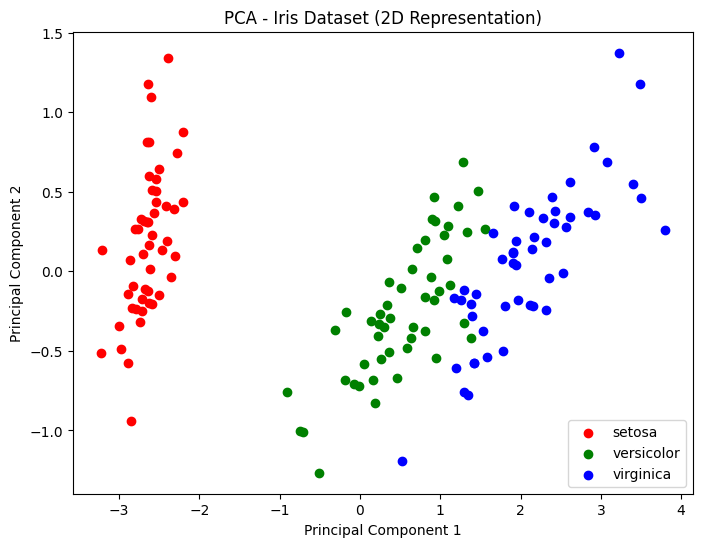

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# 1. Load Dataset (Iris dataset)
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# 2. Apply PCA to reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 3. Create a DataFrame for visualization
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y

# 4. Scatter plot of reduced dimensions
plt.figure(figsize=(8,6))
for target, color in zip([0, 1, 2], ['red', 'green', 'blue']):
    subset = df_pca[df_pca['target'] == target]
    plt.scatter(subset['PC1'], subset['PC2'], label=target_names[target], c=color)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Iris Dataset (2D Representation)')
plt.legend()
plt.show()


In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

# 1. Load and Preprocess Dataset
df = pd.read_csv("stock_prices.csv")

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort by date
df = df.sort_values('Date')

# Handle missing values
df = df.fillna(method='ffill')

# Set Date as index
df.set_index('Date', inplace=True)

print(df.head())


                  Open       Close  Volume
Date                                      
2020-01-01  100.782013  100.822876    2336
2020-01-02   99.976820   99.570254    1164
2020-01-03  100.103697  101.744409    3361
2020-01-06  101.715397  103.219214    3068
2020-01-07  102.319057  101.982234    2105


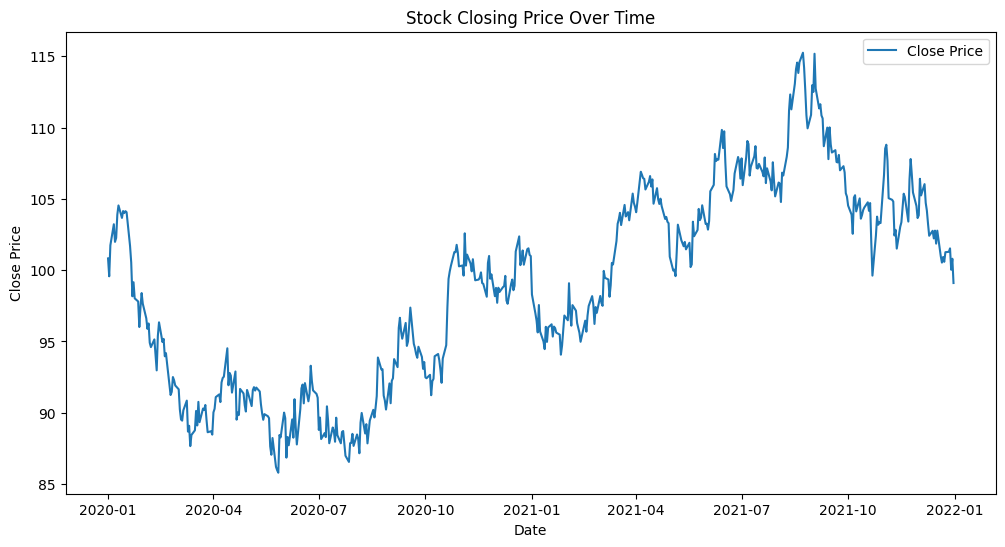

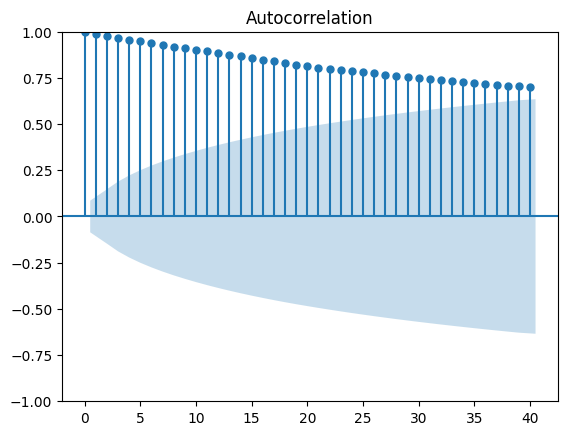

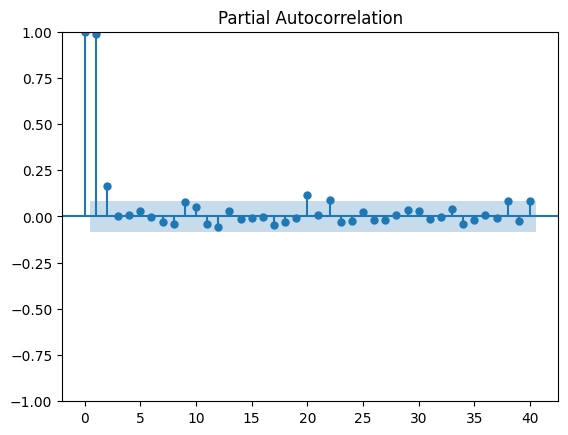

In [4]:
# Plot Close prices over time
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label="Close Price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Stock Closing Price Over Time")
plt.legend()
plt.show()

# Optional: Check ACF & PACF plots to guide ARIMA parameters
plot_acf(df['Close'], lags=40)
plot_pacf(df['Close'], lags=40)
plt.show()


In [5]:
# Lag feature: previous day's close
df['Close_Lag1'] = df['Close'].shift(1)

# Rolling mean (7-day moving average)
df['MA7'] = df['Close'].rolling(window=7).mean()

print(df.tail())


                  Open       Close  Volume  Close_Lag1         MA7
Date                                                              
2021-12-27  100.687991  101.285855    2847  101.260124  101.189985
2021-12-28  102.208161  101.528157    2712  101.285855  101.012575
2021-12-29   99.980161  100.032910    3700  101.528157  100.877197
2021-12-30  100.456462  100.800745    1700  100.032910  100.916066
2021-12-31  100.321981   99.098879    1997  100.800745  100.655744


In [6]:
# Train-Test Split (last 20% for testing)
train_size = int(len(df) * 0.8)
train, test = df['Close'][:train_size], df['Close'][train_size:]

# Fit ARIMA model (p, d, q)
model = ARIMA(train, order=(5,1,0))   # Example order, can tune with AIC/BIC
model_fit = model.fit()

print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  418
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -640.717
Date:                Sun, 24 Aug 2025   AIC                           1293.433
Time:                        18:21:56   BIC                           1317.632
Sample:                    01-01-2020   HQIC                          1303.000
                         - 08-06-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2173      0.049     -4.396      0.000      -0.314      -0.120
ar.L2         -0.0386      0.050     -0.768      0.442      -0.137       0.060
ar.L3         -0.0095      0.053     -0.180      0.8

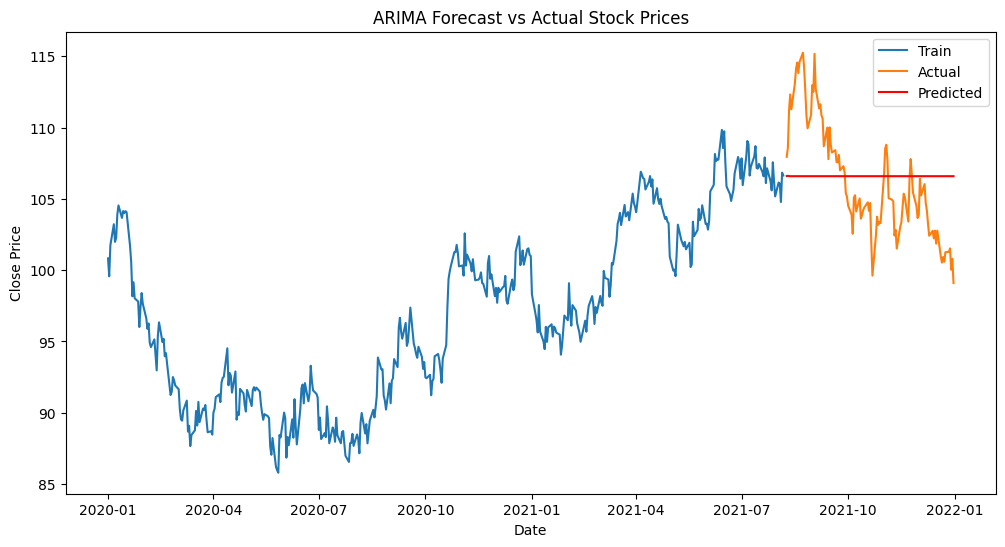

MAE: 3.43
RMSE: 4.05
MAPE: 3.22%


In [7]:
# Forecast for test set length
forecast = model_fit.forecast(steps=len(test))

# Plot predictions vs actual
plt.figure(figsize=(12,6))
plt.plot(train, label="Train")
plt.plot(test, label="Actual")
plt.plot(test.index, forecast, label="Predicted", color='red')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("ARIMA Forecast vs Actual Stock Prices")
plt.legend()
plt.show()

# Error metrics
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = np.mean(np.abs((test - forecast) / test)) * 100

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
